# Results

In [125]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [126]:
gcp_results_path = "gcp_results.csv"
df = pd.read_csv(gcp_results_path)
df = df.drop(columns=["KMeans - Best K"])
df = df.drop(columns=["KCenter -Best K"])
df["Core"] = df["Core"].where(df["Scenario"] != "Sequenziale", 1)

In [127]:
kmeans = df.drop(columns=["KCenter - Mean"]).drop(columns=["KCenter - Std"])
kmeans = kmeans.rename(columns={"KMeans - Mean": "Mean", "KMeans - Std": "Std"})
kmeans = kmeans[kmeans["Dataset"] != "Italia"]
kmeans["Mean"] = kmeans["Mean"].astype(float).round(2)
kmeans["Std"] = kmeans["Std"].astype(float).round(2)

km_aosta = kmeans[kmeans["Dataset"] == "Aosta"].drop(columns=["Dataset"])
km_umbria = kmeans[kmeans["Dataset"] == "Umbria"].drop(columns=["Dataset"])
km_roma = kmeans[kmeans["Dataset"] == "Roma"].drop(columns=["Dataset"])

kcenter = df.drop(columns=["KMeans - Mean"]).drop(columns=["KMeans - Std"])
kcenter = kcenter.rename(columns={"KCenter - Mean": "Mean", "KCenter - Std": "Std"})

kc_aosta = kcenter[kcenter["Dataset"] == "Aosta"].drop(columns=["Dataset"])
kc_umbria = kcenter[kcenter["Dataset"] == "Umbria"].drop(columns=["Dataset"])
kc_roma = kcenter[kcenter["Dataset"] == "Roma"].drop(columns=["Dataset"])
kc_italia = kcenter[kcenter["Dataset"] == "Italia"].drop(columns=["Dataset"])

In [128]:
def plot_graphs(data, title):
    seq_mean = data[data["Scenario"] == "Sequenziale"]["Mean"].values[0]

    parallelo = data[data["Scenario"] == "Parallelo"]
    parallelo = parallelo.drop(columns=["Scenario"])

    plt.figure(figsize=(10, 5))
    plt.title("{} - Parallelo".format(title))
    plt.xlabel("Core")
    plt.ylabel("Tempo (s)")

    sns.lineplot(x=parallelo["Core"], y=parallelo["Mean"], label="Parallelo")
    sns.lineplot(x=parallelo["Core"], y=[seq_mean]*len(parallelo), color="r", linestyle="--", label="Sequenziale")
    sns.scatterplot(x=parallelo["Core"], y=parallelo["Mean"], color="red", zorder=10)
    plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
    plt.xticks(parallelo["Core"])

    minCore = parallelo["Core"].min()
    maxCore = parallelo["Core"].max()
    plt.xlim(minCore, maxCore)
    plt.legend()
    plt.show()


    distribuito = data[data["Scenario"] == "Distribuito"]
    distribuito = distribuito.drop(columns=["Scenario"])

    plt.figure(figsize=(10, 5))
    plt.title("{} - Distribuito".format(title))
    plt.xlabel("Nodi")
    plt.ylabel("Tempo (s)")

    sns.lineplot(x=distribuito["Nodi Worker"], y=distribuito["Mean"], label="Distribuito")
    sns.lineplot(x=distribuito["Nodi Worker"], y=[seq_mean]*len(distribuito), color="r", linestyle="--", label="Sequenziale")
    sns.scatterplot(x=distribuito["Nodi Worker"], y=distribuito["Mean"], color="red", zorder=10)
    plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
    plt.xticks(distribuito["Nodi Worker"])

    minNodi = distribuito["Nodi Worker"].min()
    maxNodi = distribuito["Nodi Worker"].max()
    plt.xlim(minNodi, maxNodi)
    plt.legend()
    plt.show()    

# Aosta

## Kmeans

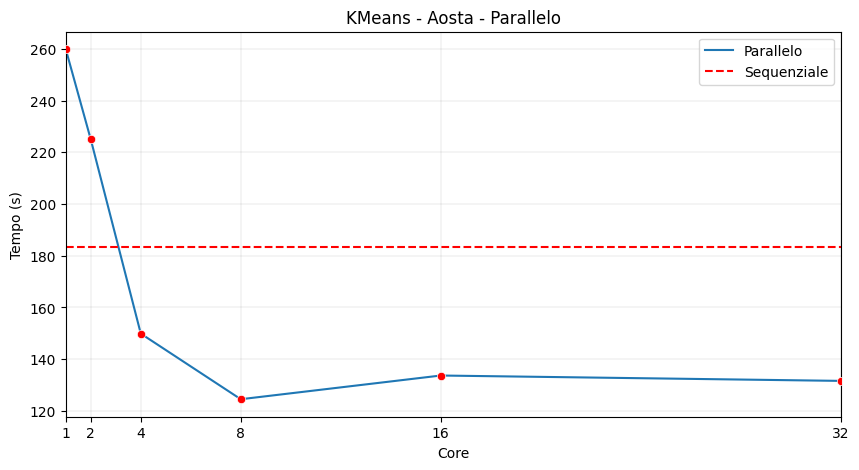

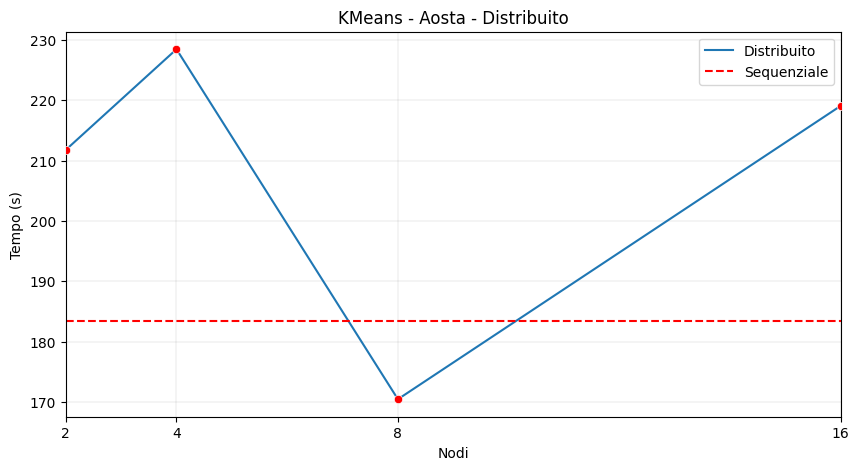

In [129]:
plot_graphs(km_aosta, "KMeans - Aosta")

## KCenter

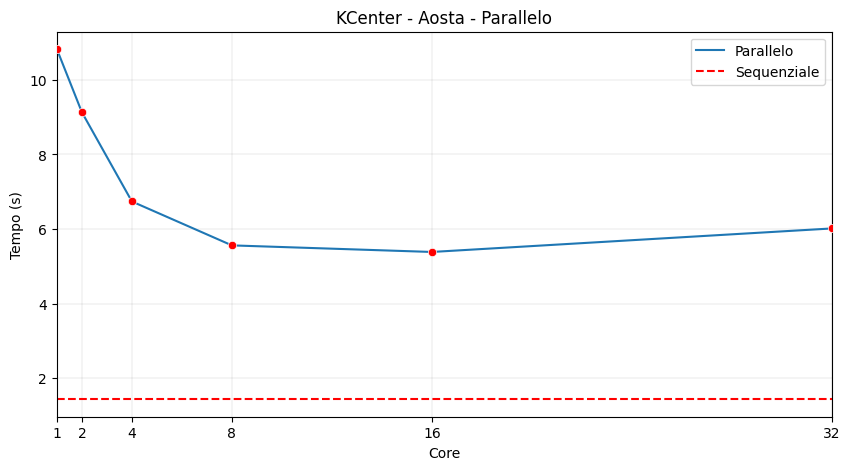

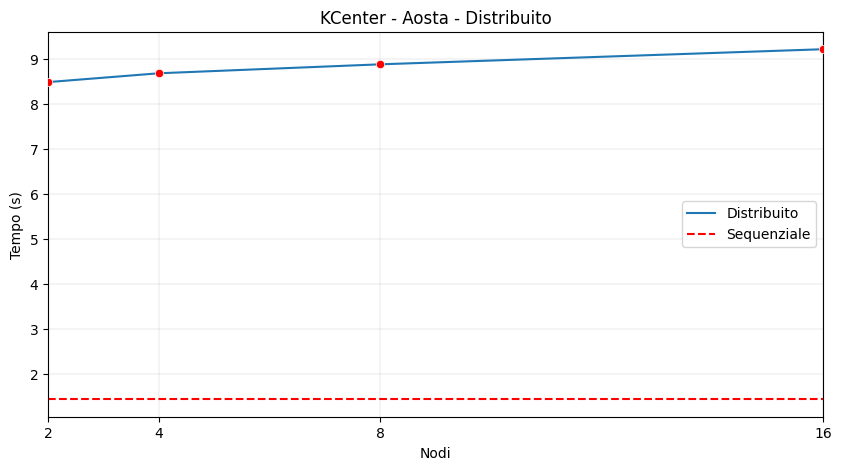

In [130]:
plot_graphs(kc_aosta, "KCenter - Aosta")

# Umbria

## KMeans

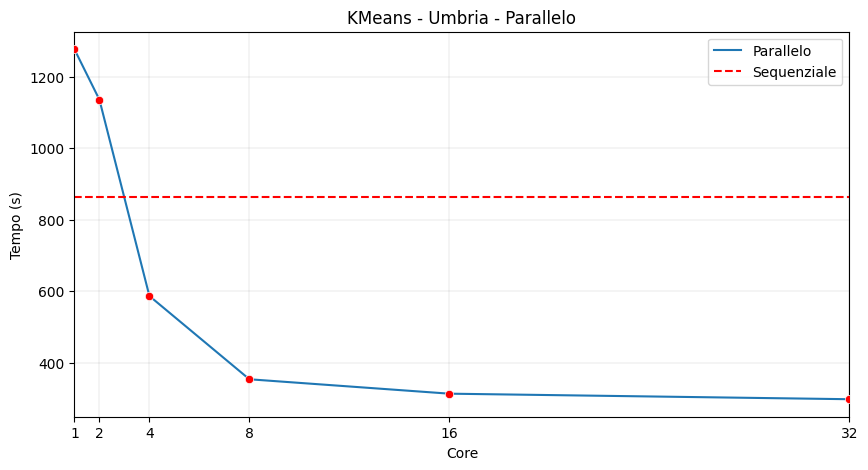

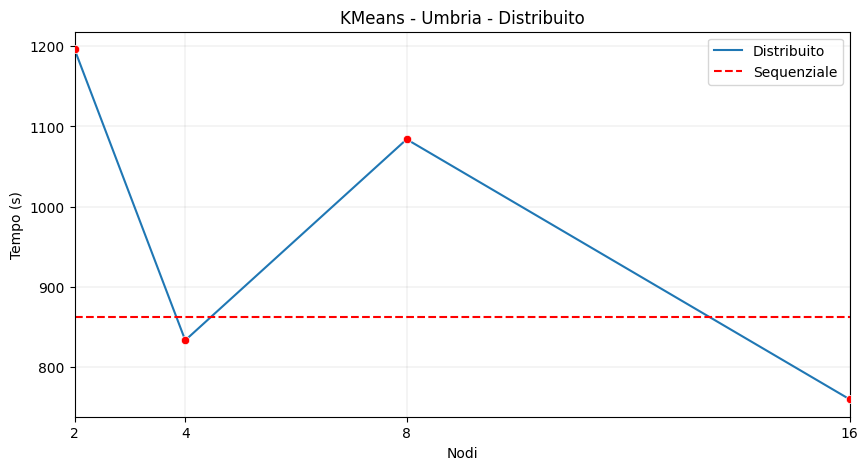

In [131]:
plot_graphs(km_umbria, "KMeans - Umbria")

## KCenter

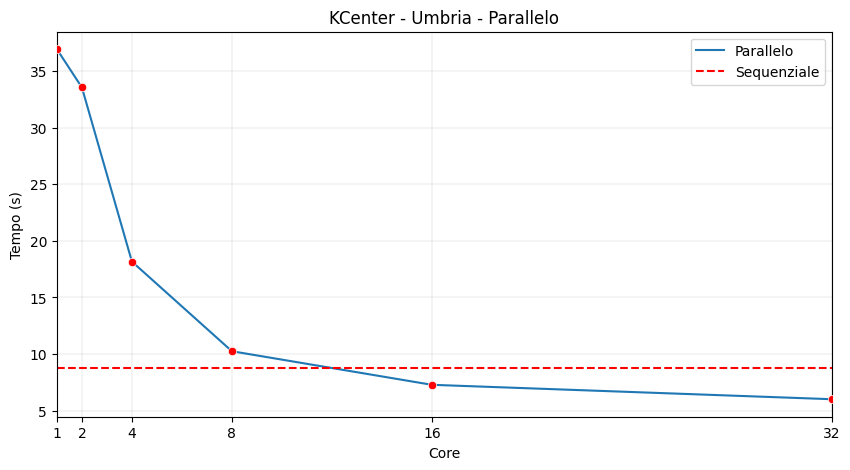

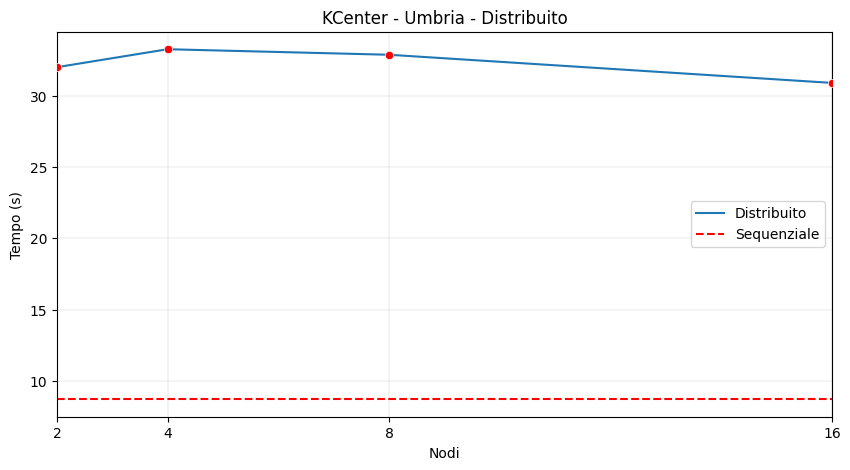

In [132]:
plot_graphs(kc_umbria, "KCenter - Umbria")

# Roma

## KMeans

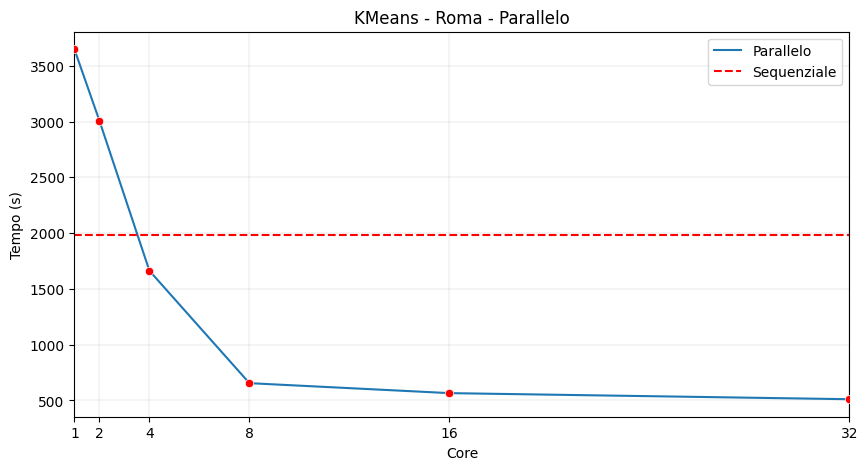

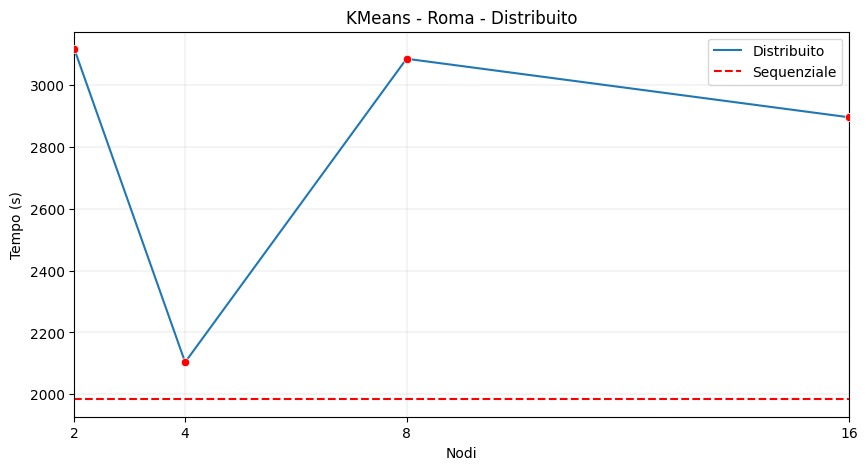

In [133]:
plot_graphs(km_roma, "KMeans - Roma")

## KCenter

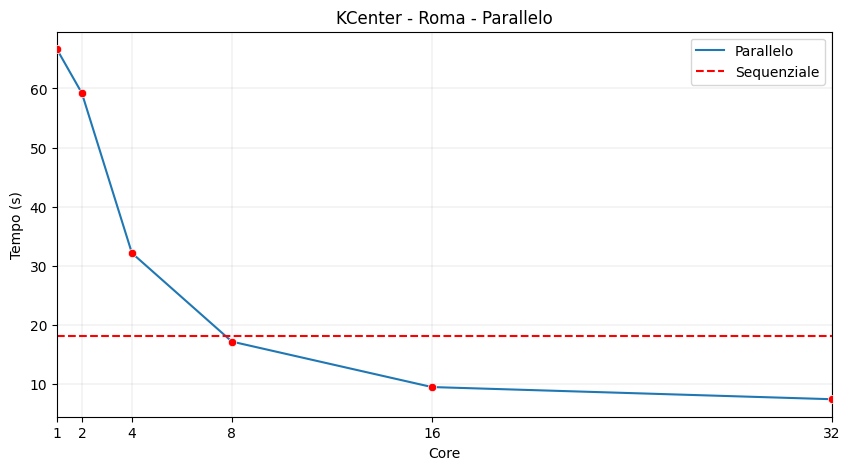

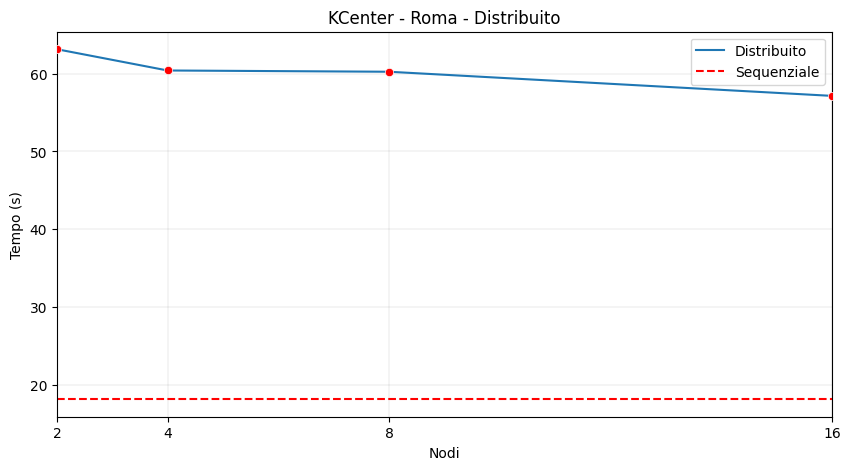

In [134]:
plot_graphs(kc_roma, "KCenter - Roma")

# Italia

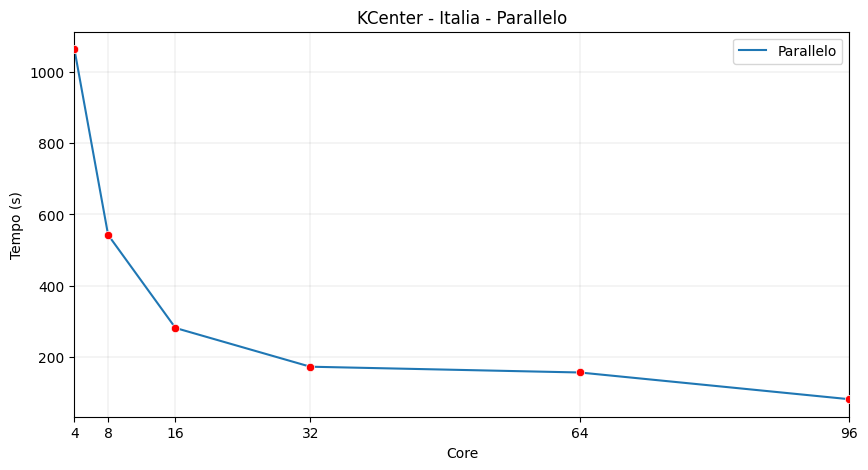

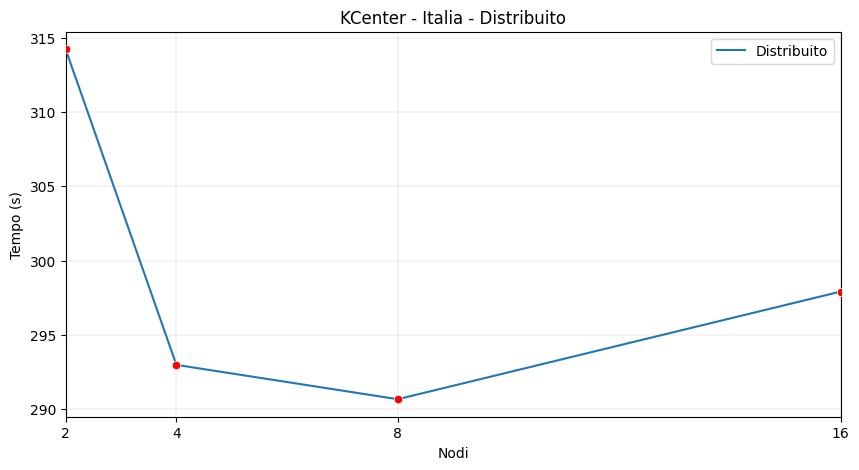

In [135]:
parallelo = kc_italia[kc_italia["Scenario"] == "Parallelo"]
parallelo = parallelo.drop(columns=["Scenario"])

plt.figure(figsize=(10, 5))
plt.title("KCenter - Italia - Parallelo")
plt.xlabel("Core")
plt.ylabel("Tempo (s)")

sns.lineplot(x=parallelo["Core"], y=parallelo["Mean"], label="Parallelo")
sns.scatterplot(x=parallelo["Core"], y=parallelo["Mean"], color="red", zorder=10)
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
plt.xticks(parallelo["Core"])

minCore = parallelo["Core"].min()
maxCore = parallelo["Core"].max()
plt.xlim(minCore, maxCore)
plt.legend()
plt.show()

distribuito = kc_italia[kc_italia["Scenario"] == "Distribuito"]
distribuito = distribuito.drop(columns=["Scenario"])

plt.figure(figsize=(10, 5))
plt.title("KCenter - Italia - Distribuito")
plt.xlabel("Nodi")
plt.ylabel("Tempo (s)")

sns.lineplot(x=distribuito["Nodi Worker"], y=distribuito["Mean"], label="Distribuito")
sns.scatterplot(x=distribuito["Nodi Worker"], y=distribuito["Mean"], color="red", zorder=10)
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
plt.xticks(distribuito["Nodi Worker"])

minNode = distribuito["Nodi Worker"].min()
maxNode = distribuito["Nodi Worker"].max()
plt.xlim(minNode, maxNode)
plt.legend()
plt.show()    